#### 추론통계 : 모수추정, 가설검정, 예측

#### 표본집단 -> 모집단 추정
#### 문제정의 -> 데이터 수집 -> 데이터 탐색 및 전처리 -> 데이터변환/정제 -> 통계모형 수립(모델링)-> 모형적합 -> 모형평가 -> 결론도출 
#### 통계분석 flow == 머신러닝 flow
#### 목적 : 예측, 변수 분류, 변수 종속 관계
#### 데이터 이해, 해석, 분석기획까지

#### 모집단 : 연구자가 알고 싶어하는 대상/ 집단전체
#### 모수 : 표본 관측에 의해 구하고자 하는 모집단에 대한 정보.
#### 표본 : 연구자가 측정 또는 관찰한 결과들의 집합
#### 통계량 : 표본에 대한 정보, 특성을 나타내는  수치
#### 원소 : 모집단을 구성하는 개체
#### 뮤, 시그마(모표준편차)
#### 엑스바, 에스(표본 표준편차)


In [1]:
# 일표본 검정, 정규성 검정 
# H0 : 고양이몸무게의 평균 = 2.6
# H1 : 고양이몸무게의 평균 != 2.6
# 유의수준 : 0.05, 양측검정

In [2]:
import pandas as pd
cats = pd.read_csv('data/cats.csv')
cats

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [3]:
# Bwt 정규성 검정 : Shapiro test
# 귀무가설 : 정규성을 가진다
# 대립가설 : 정규성 X

import scipy.stats as stats
from scipy.stats import shapiro
mu = 2.6
shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

In [5]:
# P-Value가 0.0000673이므로 귀무가설 기각, 즉 정규성 X
# wilcoxon test로 T-검정 진행

In [14]:
stats.wilcoxon(cats.Bwt - mu, alternative='two-sided') # 아래에서 나온 P-Value 값은 양쪽의 P-value

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

In [7]:
# 왜 귀무가설을 기각하지?

In [8]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

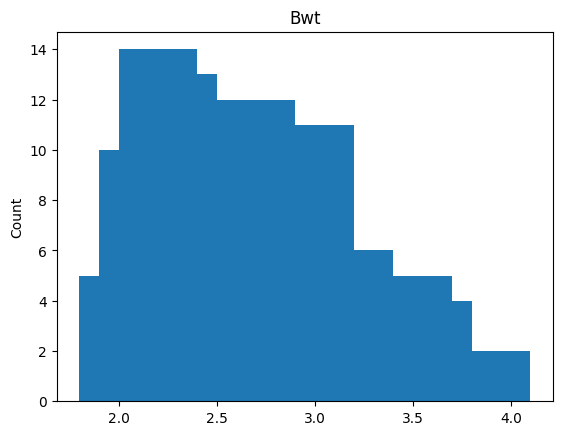

In [12]:
cats_Bwt_cnt = pd.value_counts(cats['Bwt'].values, sort = False)


width =0.4
plt.bar(cats_Bwt_cnt.index, cats_Bwt_cnt.values, width)
plt.title('Bwt')
plt.ylabel('Count')

In [ ]:
# 대응표본 T검정
# 정규성 가정, 유의수준 = 0.05, 단측검정

In [15]:
data = {'before' : [7,3,4,5,2,1,6,6,5,4],
        'after' : [8,4,5,6,2,3,6,8,6,5]}

data = pd.DataFrame(data)
data

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [16]:
data.mean()

before    4.3
after     5.3
dtype: float64

In [18]:
stats.ttest_rel(data['after'], data['before'], alternative='greater')

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082764)

In [ ]:
# 독립표본 - T검정

In [19]:
cats

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [20]:
# 정규성 만족한다는 가정하고 등분산 검정

In [21]:
female = cats.loc[cats.Sex == 'F', 'Bwt']
male = cats.loc[cats.Sex == 'M', 'Bwt']
stats.levene(female, male)

# H0 : 등분산을 만족한다
# H1 : 등분산을 만족하지 않는다.
# 검정결과 : 대립가설 채택

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [24]:
# 성별에 따른 몸무게가 등분산성을 만족하지 않는 다는 조건 하에 독립 T 검정 수행
stats.ttest_ind(female, male, equal_var = False)
# 검정결과 : 귀무가설 기각(고양이들의 성별에 따른 몸무게는 통계적으로 유의한 차이가 존재한다.)

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

In [26]:
print(female.mean())
print(male.mean())
# 5.4 차이는 두 집단의 분산의 의해 통계적으로 차이가 있다고 얘기할 수 있다.

2.359574468085107
2.8999999999999995


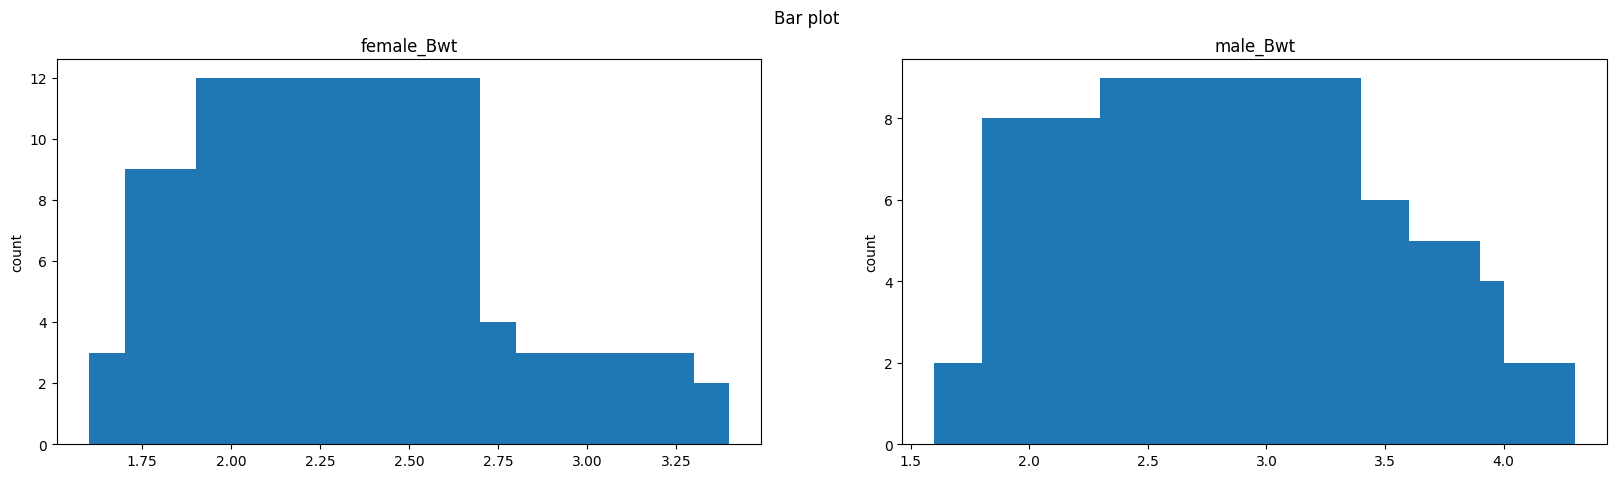

In [28]:
female_Bwt_Cnt = pd.value_counts(female.values, sort = False)
male_Bwt_Cnt = pd.value_counts(male.values, sort = False)

fig, axs = plt.subplots(1,2,figsize=(20,5))
fig.suptitle('Bar plot')
width = 0.4

axs[0].bar(female_Bwt_Cnt.index, female_Bwt_Cnt.values)
axs[0].set_title('female_Bwt')
axs[0].set_ylabel('count')

axs[1].bar(male_Bwt_Cnt.index, male_Bwt_Cnt.values)
axs[1].set_title('male_Bwt')
axs[1].set_ylabel('count')

plt.show()